In [13]:
%load_ext autoreload
%autoreload 2
import jax
from jax import random
from envs.rodent import RodentTracking
from envs.humanoid import HumanoidTracking
from envs.ant import AntTracking

from brax.training.agents.ppo import networks as ppo_networks

import numpy as np
import mediapy as media
import jax.numpy as jp
import mujoco
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
params = {
    "name": "rodent",
    "scale_factor": 0.9,
    "solver": "cg",
    "iterations": 6,
    "ls_iterations": 6,
    "clip_path": "transform_snips_groom.p",
    "end_eff_names": [
        "foot_L",
        "foot_R",
        "hand_L",
        "hand_R",
    ],
    "walker_body_names": [
        "torso",
        "pelvis",
        "upper_leg_L",
        "lower_leg_L",
        "foot_L",
        "upper_leg_R",
        "lower_leg_R",
        "foot_R",
        "skull",
        "jaw",
        "scapula_L",
        "upper_arm_L",
        "lower_arm_L",
        "finger_L",
        "scapula_R",
        "upper_arm_R",
        "lower_arm_R",
        "finger_R",
    ],
    "joint_names": [
        "vertebra_1_extend",
        "vertebra_2_bend",
        "vertebra_3_twist",
        "vertebra_4_extend",
        "vertebra_5_bend",
        "vertebra_6_twist",
        "hip_L_supinate",
        "hip_L_abduct",
        "hip_L_extend",
        "knee_L",
        "ankle_L",
        "toe_L",
        "hip_R_supinate",
        "hip_R_abduct",
        "hip_R_extend",
        "knee_R",
        "ankle_R",
        "toe_R",
        "vertebra_C1_extend",
        "vertebra_C1_bend",
        "vertebra_C2_extend",
        "vertebra_C2_bend",
        "vertebra_C3_extend",
        "vertebra_C3_bend",
        "vertebra_C4_extend",
        "vertebra_C4_bend",
        "vertebra_C5_extend",
        "vertebra_C5_bend",
        "vertebra_C6_extend",
        "vertebra_C6_bend",
        "vertebra_C7_extend",
        "vertebra_C9_bend",
        "vertebra_C11_extend",
        "vertebra_C13_bend",
        "vertebra_C15_extend",
        "vertebra_C17_bend",
        "vertebra_C19_extend",
        "vertebra_C21_bend",
        "vertebra_C23_extend",
        "vertebra_C25_bend",
        "vertebra_C27_extend",
        "vertebra_C29_bend",
        "vertebra_cervical_5_extend",
        "vertebra_cervical_4_bend",
        "vertebra_cervical_3_twist",
        "vertebra_cervical_2_extend",
        "vertebra_cervical_1_bend",
        "vertebra_axis_twist",
        "vertebra_atlant_extend",
        "atlas",
        "mandible",
        "scapula_L_supinate",
        "scapula_L_abduct",
        "scapula_L_extend",
        "shoulder_L",
        "shoulder_sup_L",
        "elbow_L",
        "wrist_L",
        "finger_L",
        "scapula_R_supinate",
        "scapula_R_abduct",
        "scapula_R_extend",
        "shoulder_R",
        "shoulder_sup_R",
        "elbow_R",
        "wrist_R",
        "finger_R",
    ],
    "camera": "close_profile",
}

In [15]:
env = RodentTracking(params)

In [16]:
key = random.PRNGKey(0)
jit_step = jax.jit(env.step)
jit_reset = jax.jit(env.reset)

In [17]:
next = jit_reset(key)
print("starting rollout")
mu = 0
sigma = .3
rollout = []
for _ in range(250):
    _, key = random.split(key)
    next = jit_step(next, mu + sigma * random.normal(key, shape=(env.sys.nu,)))
    rollout.append(next)

starting rollout


In [18]:
import mediapy as media
import os

os.environ["MUJOCO_GL"] = "glfw"
rollout_data = [s.pipeline_state for s in rollout]

video = env.render(rollout_data, camera='side_alt', height=512, width=512)
media.show_video(video, fps=50)

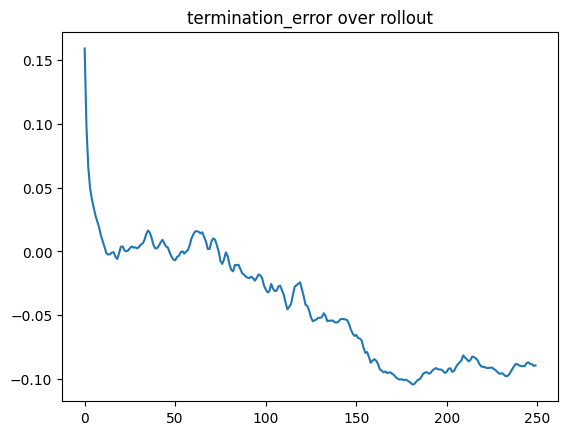

In [19]:
from matplotlib import pyplot as plt
# plot termination error over time:
errors = [s.metrics['termination_error'] for s in rollout]
plt.title("termination_error over rollout")
plt.plot(errors)